In [1]:
import mysql.connector
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
#connect to mysql server with database baby_names
cnx = mysql.connector.connect(user='python', database='baby_names')
#create mysql cursor object
cur = cnx.cursor()

In [3]:
cur.execute("select name,sex,frequency,year from baby where name = 'jennifer' and year between 1880 and 1920")
cur.fetchall()

[('Jennifer', 'F', 5, 1916),
 ('Jennifer', 'F', 6, 1919),
 ('Jennifer', 'F', 7, 1920)]

In [6]:
#find 5 most popular names for a given year
cur.execute("select name, sex from baby where year = 1880 order by frequency desc limit 5;")
cur.fetchall()

[('John', 'M'),
 ('William', 'M'),
 ('Mary', 'F'),
 ('James', 'M'),
 ('Charles', 'M')]

In [58]:
#function to plot list of names over time
#changed to include title argument
def name_plot(name_list,title = "Names over time",show_max=1):
    #create figure and subfigure
    fig = plt.figure(figsize=(10,10))
    sub = fig.subplots()
    sub.set_xlabel('Year')
    sub.set_ylabel('Numbe of People')
    sub.set_title(title)
    max_max = 0
    for name,gender in name_list:
        #save the query as text
        query = "SELECT year(year), frequency FROM test2 WHERE name='"+name+"' AND sex='"+gender+"';"
        #perform query and get results
        cur.execute(query)
        data=cur.fetchall()
        #save results into two lists
        #year
        x_val = [x[0] for x in data]
        #number of people
        y_val = [x[1] for x in data]
        #maximum number of names
        y_max = max(y_val)
        #year where maximum numbe appeared
        x_max = data[y_val.index(y_max)][0]
        #annotate the maximum if show_max == 1
        if show_max == 1:
            plt.annotate(str(name).capitalize()+' ('+str(gender)+')'+' peaked at '+str(y_max)+' in ' + str(x_max), 
                     xy=(x_max,y_max), xytext=(x_max+(x_max+100)/100,y_max+(y_max+1000)/2000),
                 arrowprops=dict(facecolor='black', shrink=.1,width = 1,headwidth=10))
            #make a dot where the maximum is
            sub.plot(x_max,y_max,'bo')
        #plot the lists against each other
        sub.plot(x_val,y_val, label="Name="+name.capitalize()+", Gender="+gender)
        #create a legend
        sub.legend(fontsize=10,loc='center left')

In [32]:
cur.fetchall()

[('John', 'M'),
 ('William', 'M'),
 ('James', 'M'),
 ('Charles', 'M'),
 ('George', 'M')]

In [69]:
def popular_names(year,gender,num=3):
    year = str(year)
    gender = str(gender)
    show_max = 1
    if num >= 4:
        show_max = 0
    num = str(num)
    gender_dict = {'m':'male','f':'female'}
    gender_string = gender_dict[gender]
    query = "select name, sex from baby where year = "+year+" and sex = '"+gender + "' order by frequency desc limit "+num+ " ;"
    cur.execute(query)
    name_list = cur.fetchall()
    return name_plot(name_list,"The " + num + " most popular "+gender_string + " names in "+year+" over time.",show_max)
    

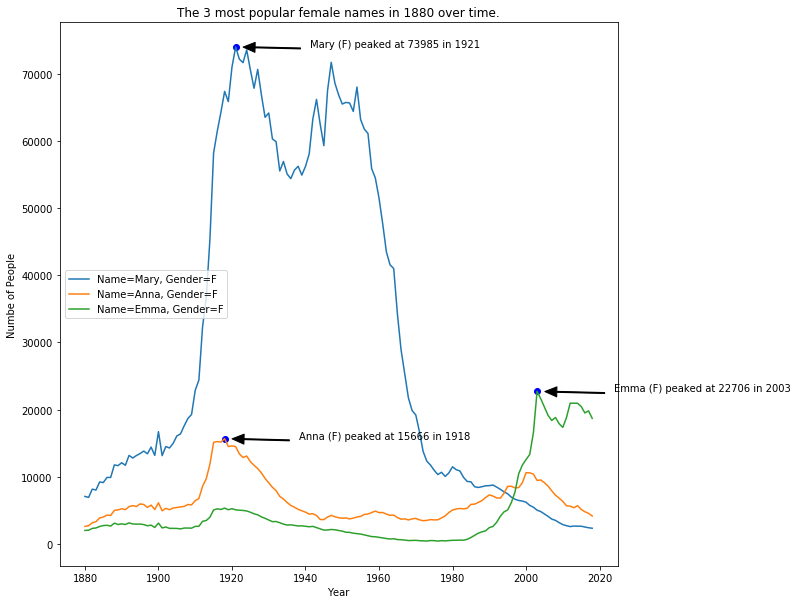

In [70]:
popular_names(1880,'f')

In [60]:
def unpopular_names(year,gender):
    year = str(year)
    gender = str(gender)
    gender_dict = {'m':'male','f':'female'}
    gender_string = gender_dict[gender]
    query = "select name, sex from baby where year = "+year+" and sex = '"+gender + "' order by frequency limit 3;"
    cur.execute(query)
    name_list = cur.fetchall()
    return name_plot(name_list,"3 of the least popular "+gender_string + " names in "+year+" over time.",0)

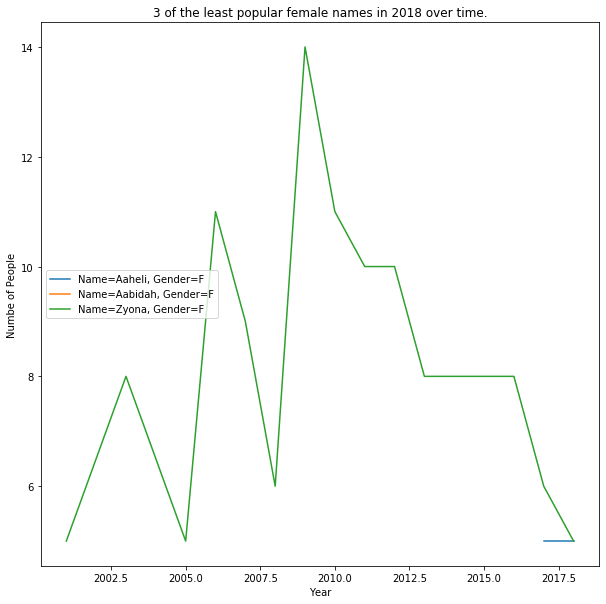

In [62]:
unpopular_names(2018,'f')

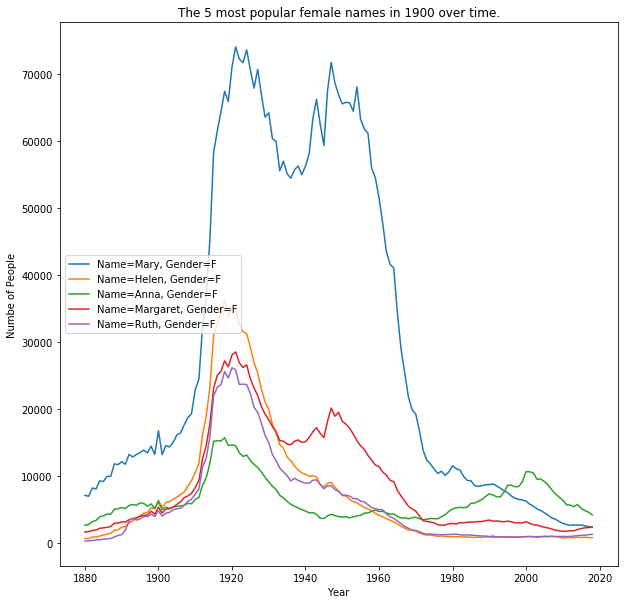

In [75]:
popular_names('1900','f',5)